In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
# Set seaborn style
sns.set(style="whitegrid", palette="Blues")

# Load dataset with selected columns
columns = ['Total Sleep Hours', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 
           'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)', 
           'Productivity Score', 'Mood Score', 'Stress Level']
df = pd.read_csv('data/sleep_cycle_productivity.csv', usecols=columns)

In [22]:
# Display basic info
display(df.head())
display(df.info())

,Total Sleep Hours,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,5.28,86,87,116,8.808920,8,3,6
1,5.41,32,21,88,6.329833,10,3,7
2,5.35,17,88,59,8.506306,10,9,10
3,7.55,46,34,80,6.070240,8,4,2
4,6.75,61,269,94,11.374994,8,7,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total Sleep Hours              5000 non-null   float64
 1   Exercise (mins/day)            5000 non-null   int64  
 2   Caffeine Intake (mg)           5000 non-null   int64  
 3   Screen Time Before Bed (mins)  5000 non-null   int64  
 4   Work Hours (hrs/day)           5000 non-null   float64
 5   Productivity Score             5000 non-null   int64  
 6   Mood Score                     5000 non-null   int64  
 7   Stress Level                   5000 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.6 KB


None

In [23]:
# Convert Productivity Score into categories
df['Productivity Category'] = pd.cut(df['Productivity Score'], bins=[-1, 3, 6, 10], labels=[0, 1, 2])

<StemContainer object of 3 artists>

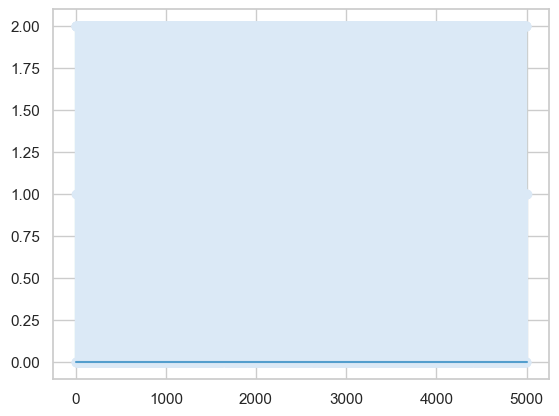

In [38]:
plt.stem(df['Productivity Category'])

In [24]:
# Compute correlation matrix
correlation_matrix = df.corr()

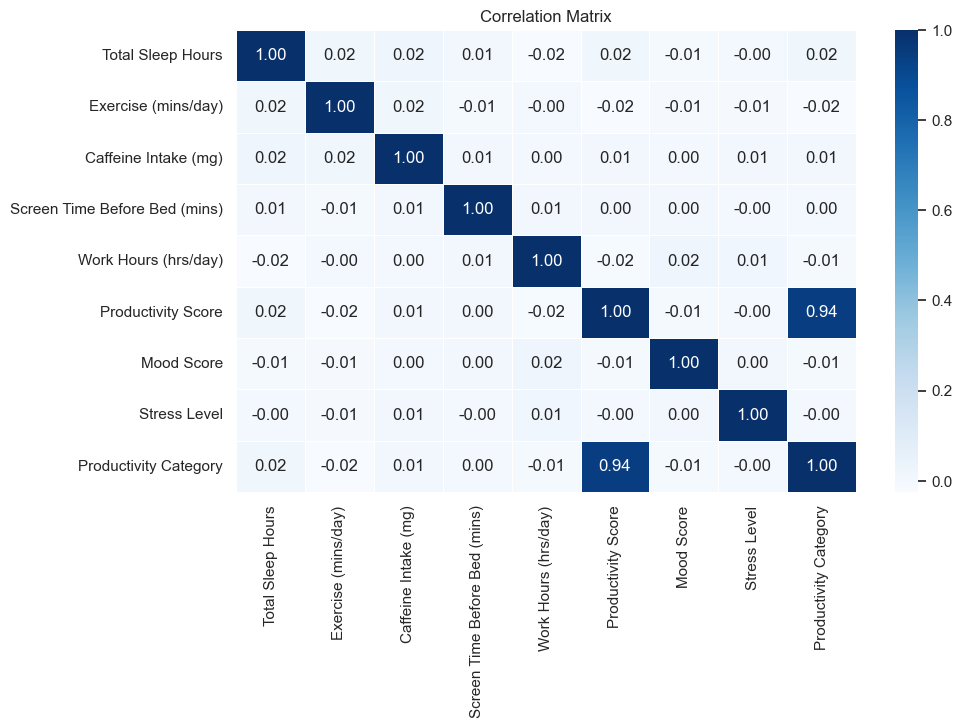

In [25]:

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

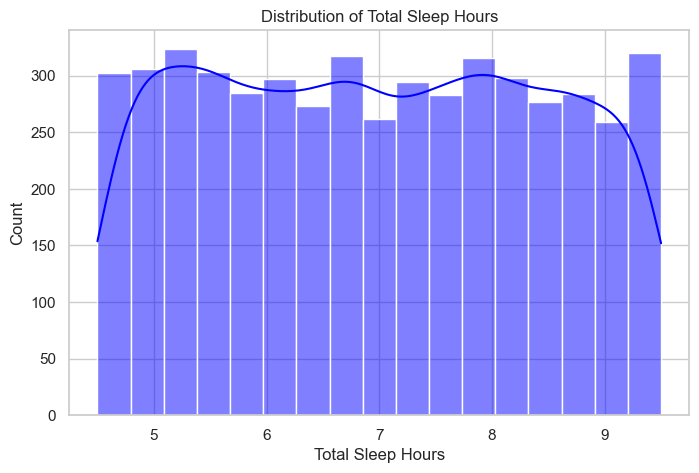

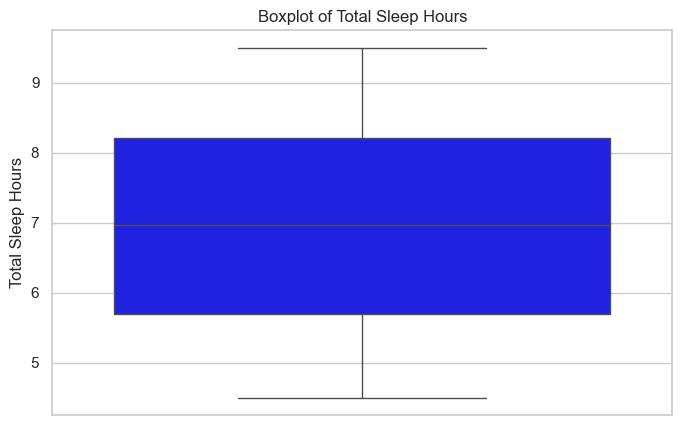

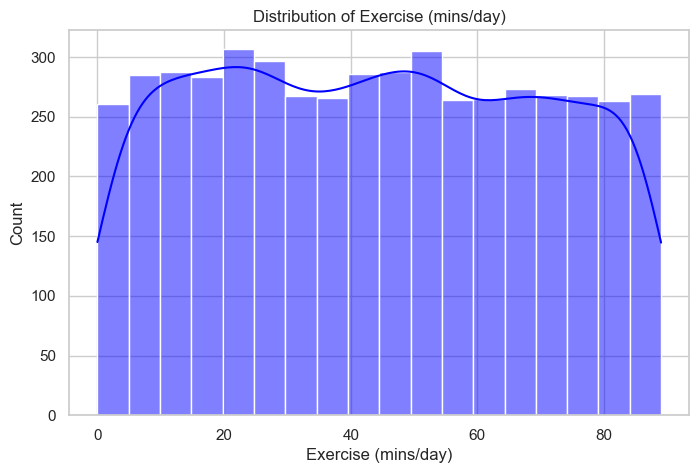

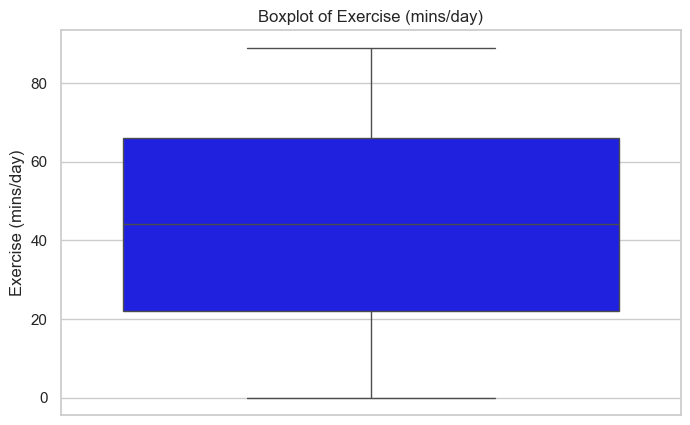

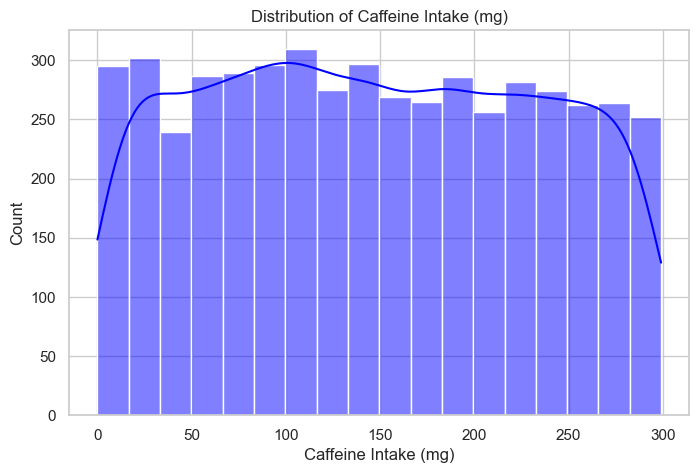

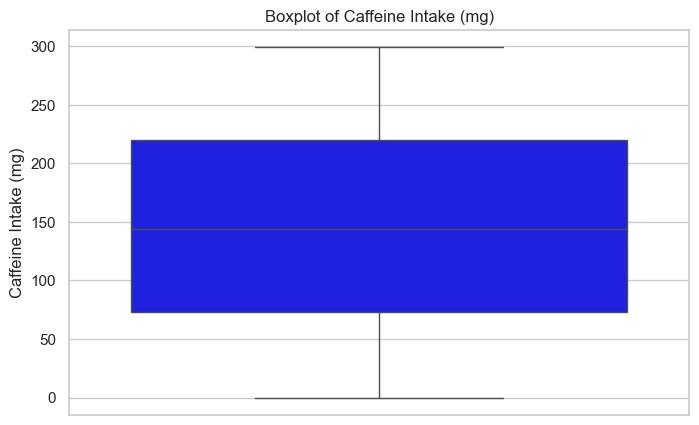

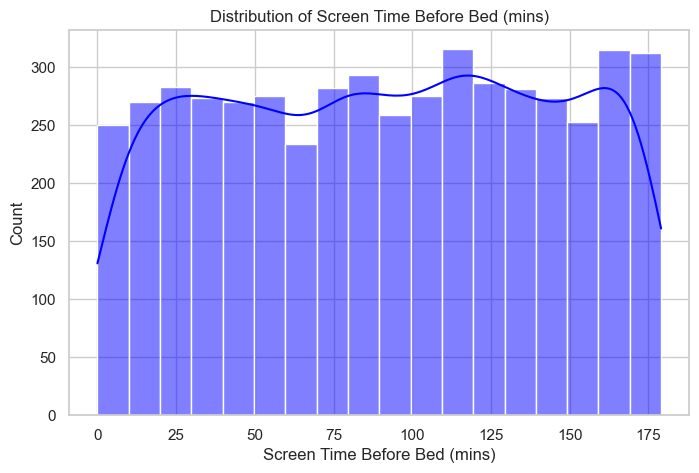

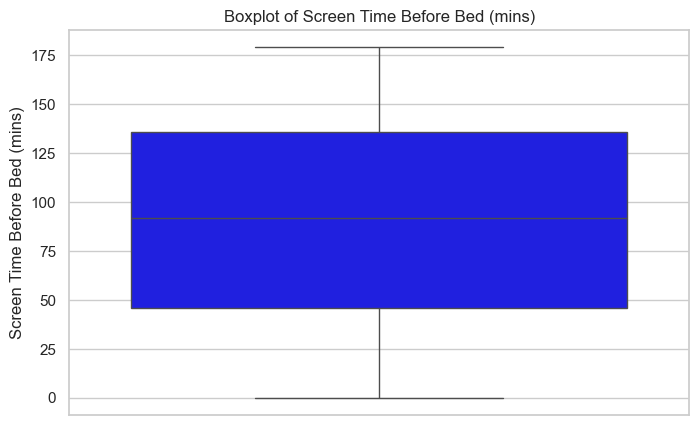

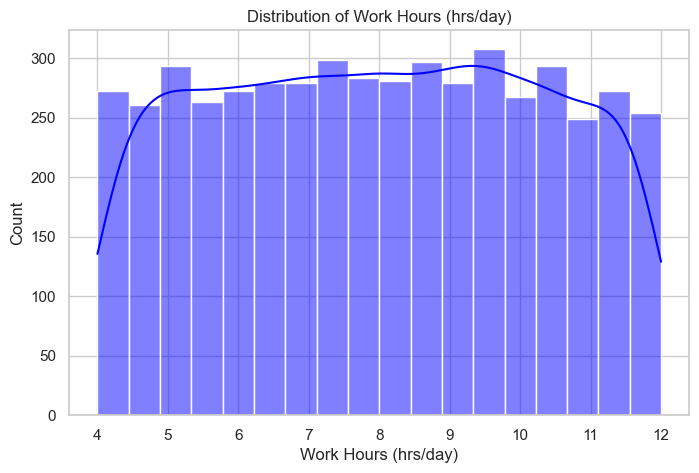

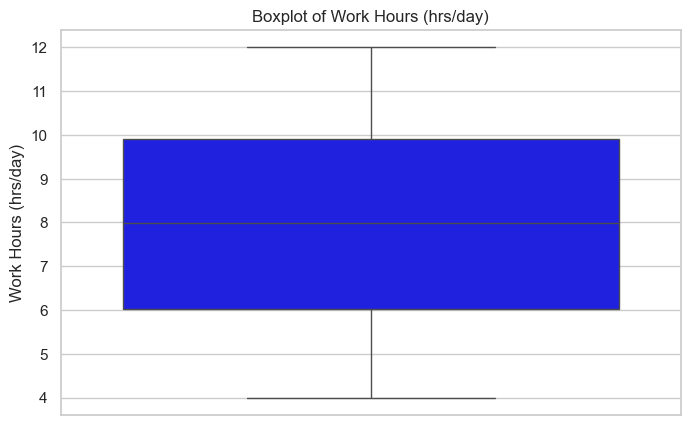

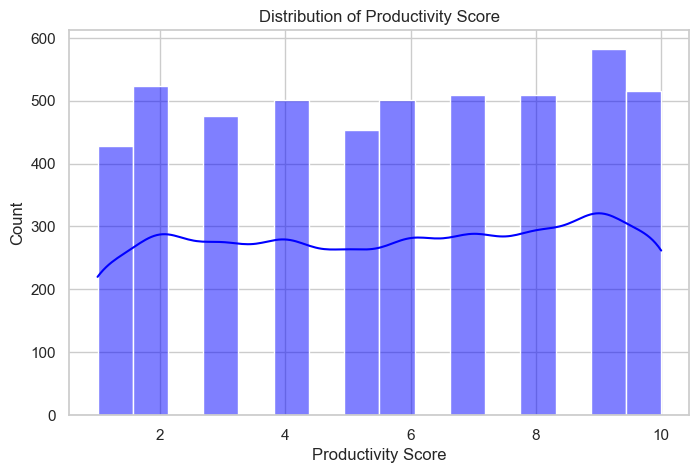

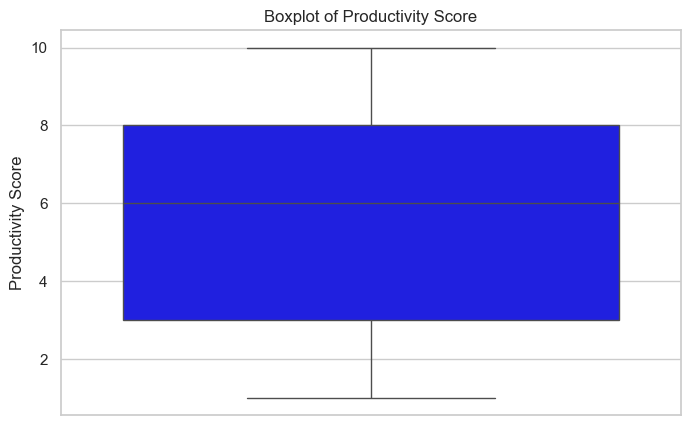

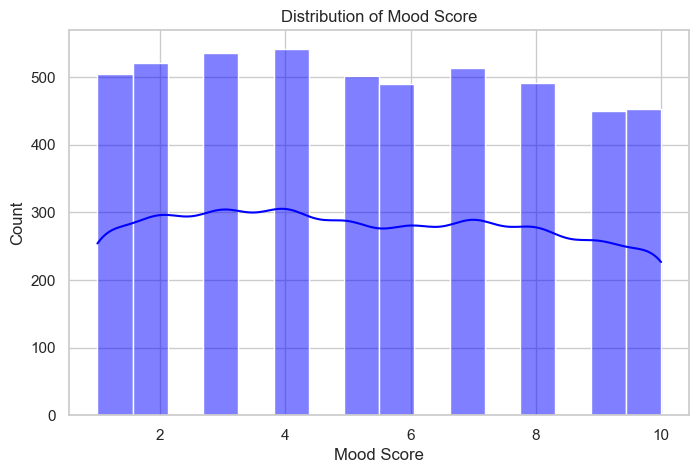

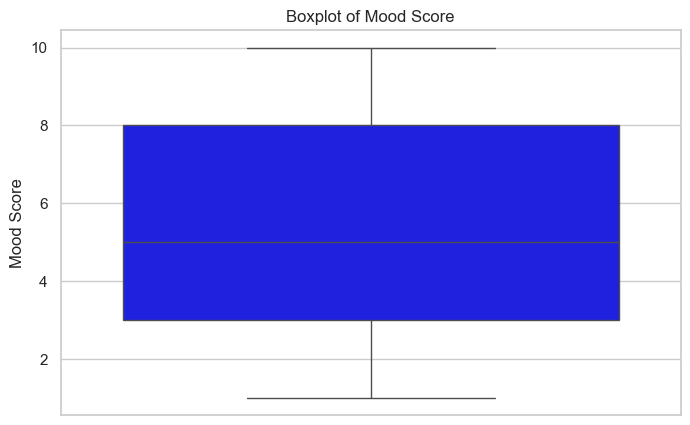

In [26]:
# Visualize distributions and boxplots
for feature in columns[:-1]:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, color="blue")
    plt.title(f"Distribution of {feature}")
    plt.show()
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[feature], color="blue")
    plt.title(f"Boxplot of {feature}")
    plt.show()

In [27]:
# Normalization and Scaling
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[columns[:-2]] = scaler.fit_transform(df_scaled[columns[:-2]])

In [28]:
# Feature selection using Logistic Regression with Lasso
X = df_scaled.drop(columns=['Productivity Score', 'Productivity Category'])
y = df['Productivity Category']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
lasso = LogisticRegressionCV(cv=5, penalty='l1', solver='saga', random_state=42, max_iter=5000)
lasso.fit(X_train, y_train)

LogisticRegressionCV(cv=5, max_iter=5000, penalty='l1', random_state=42,
                     solver='saga')

In [31]:
y_pred = lasso.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       282
           1       0.00      0.00      0.00       295
           2       0.42      1.00      0.59       423

    accuracy                           0.42      1000
   macro avg       0.14      0.33      0.20      1000
weighted avg       0.18      0.42      0.25      1000

Accuracy Score: 0.422


/Users/hfmartinez/Documents/Icesi/Semester 1/Exploratorio/analisis-exploratorio/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hfmartinez/Documents/Icesi/Semester 1/Exploratorio/analisis-exploratorio/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hfmartinez/Documents/Icesi/Semester 1/Exploratorio/analisis-exploratorio/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set 

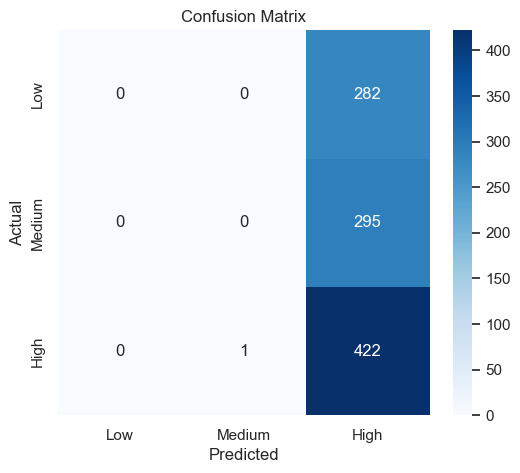

In [32]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [39]:
lasso

LogisticRegressionCV(cv=5, max_iter=5000, penalty='l1', random_state=42,
                     solver='saga')